<a href="https://colab.research.google.com/github/Zahab163/Titanic_Survival_Report/blob/main/Titanic_Survival_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

To build a complete machine learning model for predicting Titanic survival, follow these steps:

##1. Load Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#upload file
df = pd.read_csv('/content/train.csv')

In [ ]:
# Display
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Survived:** It's our Targeted Column So, we will focusus on it .
* **Name:** considering droping this column cause names are not cleary defined and cause of Data Type = Object can cause trouble in our ML modeling and we have the **PassengerId** which could be used instead.
* **Sex:** We will Change Sex into two columns Female ,Male and converting it into Boolean for furthur calcuations.
* **Cabin:** Cabin could be an effective column in survival process converting it into Boolean for ML Process.

## 2: Exploratory Data Analysis (EDA)
Understand the data's structure, distribution:


In [ ]:
# Checking Information
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Here , we have some Data Type = Object here which we have to look into because of ML Modeling

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Droping Null Values for Satisafaction
df.dropna()
len(df)

891

Now we will handle our Data Type =Object Here,
for Preparing for Our ML Modeling .

##3. Data Preprocessing
Handle Missing Values and Changing Data Type from Object to Boolean for Machice Learning Model Processing.

In [ ]:
# Fill missing ages with median based on Pclass
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Fill missing embarked with mode
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
# Checking the value count cause of object type: strings variables to take the idea of the distribution
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
# Checking the value count cause of object type: strings variables to take the idea of the distribution
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
# Checking the value count cause of object type: strings variables to take the idea of the distribution
df['Cabin'].value_counts()


,count
Cabin,
B96 B98,691
C23 C25 C27,4
G6,4
F33,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
# Checking the value count cause of object type: strings variables to take the idea of the distribution
df['Ticket'].value_counts()

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


In [ ]:
# removing names due  different names
# removing ticket cause not needed
df = df.drop(['Name', 'Ticket'], axis=1)

#checking the changes apply by displaying the data
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [ ]:
#Making Sex into Two different groups for turning Data Type=Object into Boolean for ML Modeling
df = pd.concat([df, pd.get_dummies(df["Sex"], prefix="Sex")], axis=1).drop(["Sex"], axis=1)
display(df.sample(10, random_state=14))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
75,76,0,3,25.0,0,0,7.6500,F G73,S,False,True
602,603,0,1,37.0,0,0,42.4000,B96 B98,S,False,True
119,120,0,3,2.0,4,2,31.2750,B96 B98,S,True,False
647,648,1,1,56.0,0,0,35.5000,A26,C,False,True
115,116,0,3,21.0,0,0,7.9250,B96 B98,S,False,True
472,473,1,2,33.0,1,2,27.7500,B96 B98,S,True,False
547,548,1,2,29.0,0,0,13.8625,B96 B98,C,False,True
735,736,0,3,28.5,0,0,16.1000,B96 B98,S,False,True
467,468,0,1,56.0,0,0,26.5500,B96 B98,S,False,True
759,760,1,1,33.0,0,0,86.5000,B77,S,True,False


In [ ]:
# Distributing Cabin into different Columns to turn it into Boolean same as Sex Column for ML processing
df = pd.concat([df, pd.get_dummies(df["Cabin"], prefix="C")], axis=1).drop(["Cabin"], axis=1)
display(df.sample(10, random_state=14))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,...,C_E8,C_F E69,C_F G63,C_F G73,C_F2,C_F33,C_F38,C_F4,C_G6,C_T
75,76,0,3,25.0,0,0,7.6500,S,False,True,...,False,False,False,True,False,False,False,False,False,False
602,603,0,1,37.0,0,0,42.4000,S,False,True,...,False,False,False,False,False,False,False,False,False,False
119,120,0,3,2.0,4,2,31.2750,S,True,False,...,False,False,False,False,False,False,False,False,False,False
647,648,1,1,56.0,0,0,35.5000,C,False,True,...,False,False,False,False,False,False,False,False,False,False
115,116,0,3,21.0,0,0,7.9250,S,False,True,...,False,False,False,False,False,False,False,False,False,False
472,473,1,2,33.0,1,2,27.7500,S,True,False,...,False,False,False,False,False,False,False,False,False,False
547,548,1,2,29.0,0,0,13.8625,C,False,True,...,False,False,False,False,False,False,False,False,False,False
735,736,0,3,28.5,0,0,16.1000,S,False,True,...,False,False,False,False,False,False,False,False,False,False
467,468,0,1,56.0,0,0,26.5500,S,False,True,...,False,False,False,False,False,False,False,False,False,False
759,760,1,1,33.0,0,0,86.5000,S,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Same as above changinging Data Type= Object into Boolean for ML Modeling
df = pd.concat([df, pd.get_dummies(df["Embarked"], prefix="E")], axis=1).drop(["Embarked"], axis=1)
df.sample(10, random_state=14)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,C_A10,...,C_F G73,C_F2,C_F33,C_F38,C_F4,C_G6,C_T,E_C,E_Q,E_S
75,76,0,3,25.0,0,0,7.6500,False,True,False,...,True,False,False,False,False,False,False,False,False,True
602,603,0,1,37.0,0,0,42.4000,False,True,False,...,False,False,False,False,False,False,False,False,False,True
119,120,0,3,2.0,4,2,31.2750,True,False,False,...,False,False,False,False,False,False,False,False,False,True
647,648,1,1,56.0,0,0,35.5000,False,True,False,...,False,False,False,False,False,False,False,True,False,False
115,116,0,3,21.0,0,0,7.9250,False,True,False,...,False,False,False,False,False,False,False,False,False,True
472,473,1,2,33.0,1,2,27.7500,True,False,False,...,False,False,False,False,False,False,False,False,False,True
547,548,1,2,29.0,0,0,13.8625,False,True,False,...,False,False,False,False,False,False,False,True,False,False
735,736,0,3,28.5,0,0,16.1000,False,True,False,...,False,False,False,False,False,False,False,False,False,True
467,468,0,1,56.0,0,0,26.5500,False,True,False,...,False,False,False,False,False,False,False,False,False,True
759,760,1,1,33.0,0,0,86.5000,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Displaying the Data Frame to check the changes
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,C_A10,...,C_F G73,C_F2,C_F33,C_F38,C_F4,C_G6,C_T,E_C,E_Q,E_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Checking the Satistical values of the Numerical Data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##4. Visualization
Multiple Plots: Comprehensive exploratory data analysis

* Different Plots visualizations to understand data patterns.
* Correlation heatmap to identify relationships between features

* Detailed analysis of how each feature relates to survival







In [ ]:
# Seaborn Magic
# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

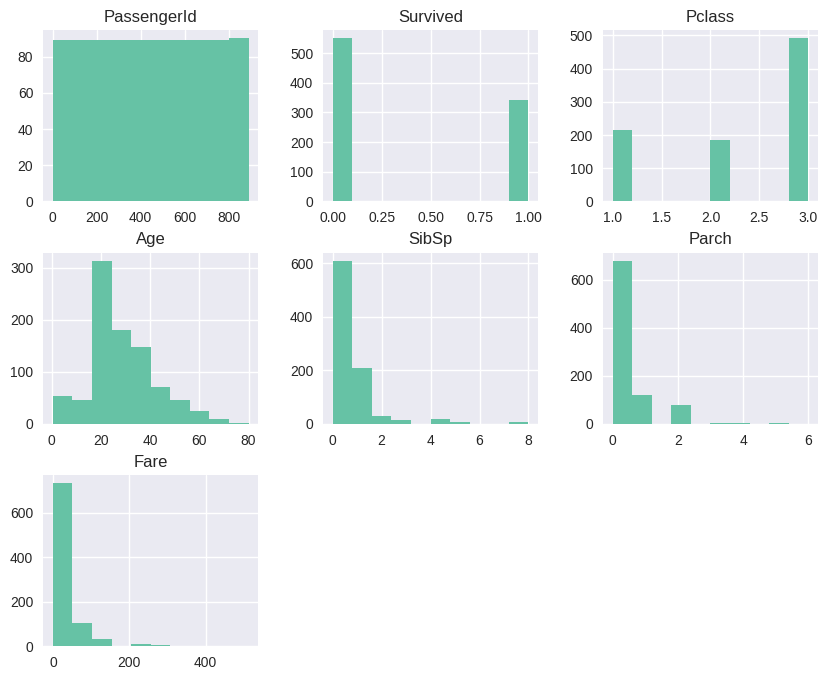

In [ ]:
# Making a histogram for entire numeric variables in dataframe
df.hist(figsize=(10, 8))
plt.show()


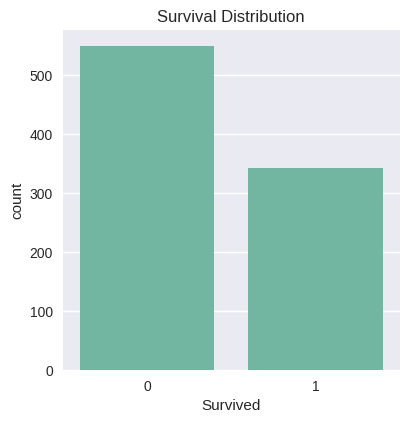

In [ ]:

# 1. Survival distribution
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

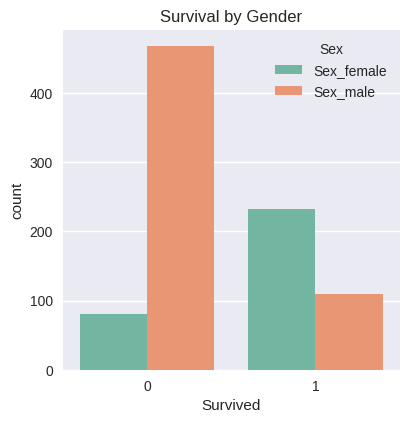

In [ ]:
# 2. Survival by gender
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 2)

# Melt the DataFrame to work with one-hot encoded Sex columns
sex_survival = df[['Survived', 'Sex_female', 'Sex_male']].melt(
    id_vars='Survived', var_name='Sex', value_name='Presence'
)

# Filter for rows where the sex is present (True)
sex_survival = sex_survival[sex_survival['Presence'] == True]

# Plot the survival count by sex
sns.countplot(x='Survived', hue='Sex', data=sex_survival)
plt.title('Survival by Gender')
plt.show()

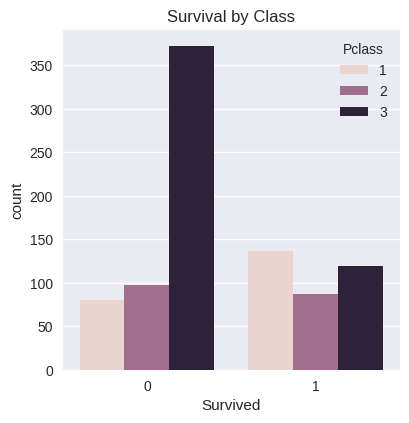

In [ ]:
# 3. Survival by class
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 3)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.show()


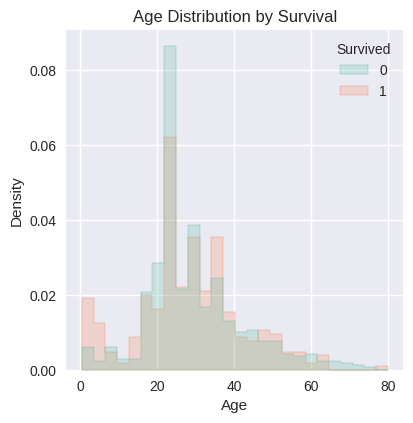

In [ ]:
# 4. Age distribution by survival
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 4)
sns.histplot(data=df, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival')
plt.show()


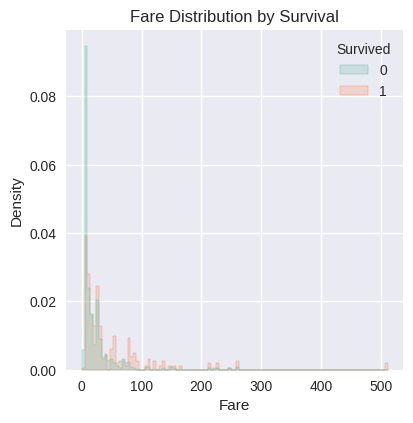

In [ ]:

# 5. Fare distribution by survival
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 5)
sns.histplot(data=df, x='Fare', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Fare Distribution by Survival')
plt.show()

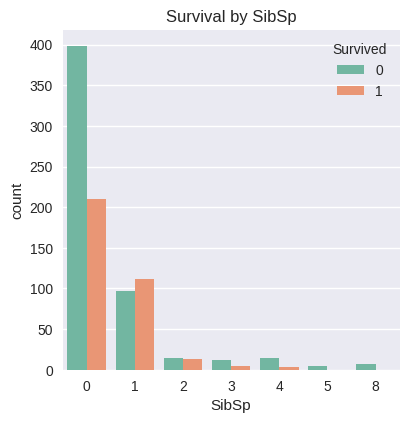

In [ ]:
# 6. SibSp vs survival
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 7)
sns.countplot(x='SibSp', hue='Survived', data=df)

plt.title('Survival by SibSp')
plt.show()

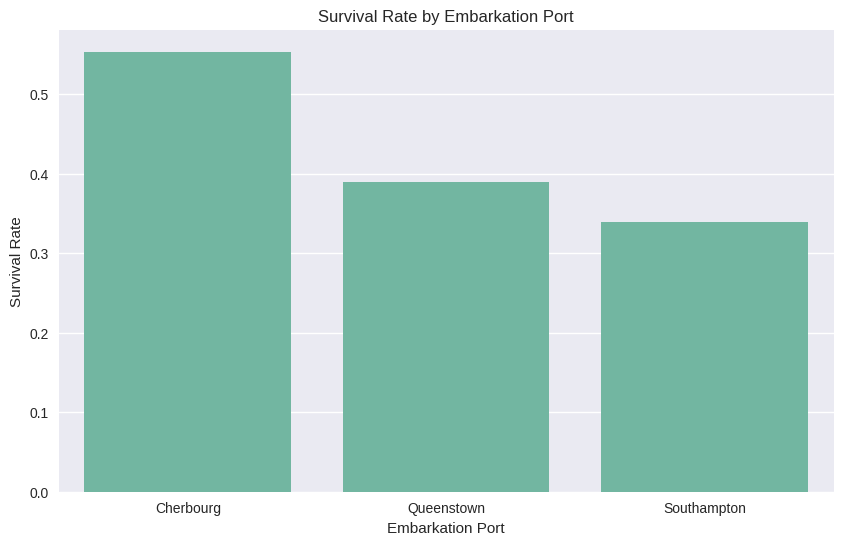

In [ ]:
# 7. Embarkment port vs survival
# We can visualize the survival rate for each embarkation port
# by using the one-hot encoded columns.
plt.figure(figsize=(10, 6))
embarkation_survival_rate = df[['Survived', 'E_C', 'E_Q', 'E_S']].melt(id_vars='Survived', var_name='Embarked', value_name='Presence')
embarkation_survival_rate = embarkation_survival_rate[embarkation_survival_rate['Presence'] == True]
sns.barplot(x='Embarked', y='Survived', data=embarkation_survival_rate, errorbar=None)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

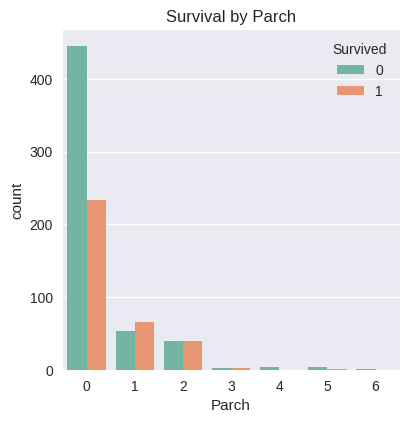

In [ ]:
# 10. Parch vs survival
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 8)
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival by Parch')
plt.show()

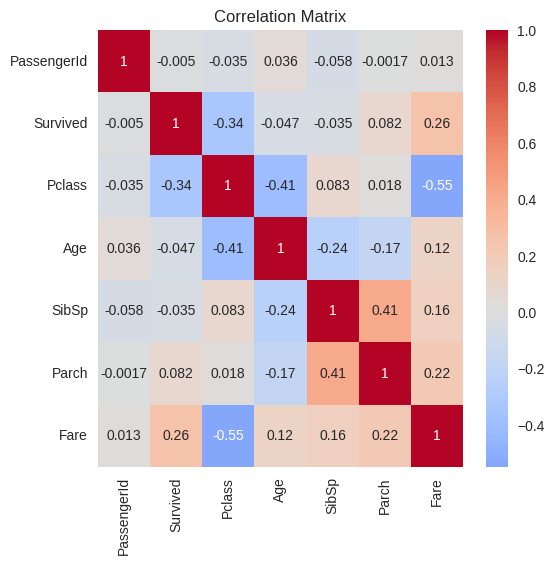

In [ ]:
# 11. Correlation heatmap
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 9)
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.dropna()
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Importing ML and Feature Engineering libraries and Models
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
import warnings
warnings.filterwarnings('ignore')


* **sklearn.model_selection:** This module provides tools for splitting data into training and testing sets and for cross-validation.
* **train_test_split:** Used to split data into random train and test subsets.
* **cross_val_score:** Evaluates a score by cross-validation.
* **StratifiedKFold:** A variation of K-Fold that returns stratified folds (maintains the proportion of each class).
sklearn.preprocessing: This module includes utilities for scaling and transforming data.
* **StandardScaler:** Standardizes features by removing the mean and scaling to unit variance.
LabelEncoder: Encodes target labels with values between 0 and n_classes-1.
* **sklearn.ensemble:** This module includes ensemble methods.
* **RandomForestClassifier:** A meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the accuracy and control over-fitting.
* **GradientBoostingClassifier:** Builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.
* **AdaBoostClassifier:** A meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
* **sklearn.svm:** This module includes Support Vector Machine models.
SVC: A classifier that implements the Support Vector Machine algorithm.
sklearn.linear_model: This module includes linear models.
LogisticRegression: A linear model for classification.
sklearn.neighbors: This module includes neighbor-based models.
KNeighborsClassifier: Implements the k-nearest neighbors algorithm used for classification.
sklearn.naive_bayes: This module includes Naive Bayes models.
GaussianNB: Implements the Gaussian Naive Bayes algorithm for classification.
sklearn.metrics: This module includes scoring functions, performance metrics, and pairwise metrics.
accuracy_score: Computes the accuracy score.
confusion_matrix: Computes the confusion matrix.
classification_report: Builds a text report showing the main classification metrics.
roc_curve, auc: Compute Receiver operating characteristic (ROC) curve and Area Under the Curve (AUC) from prediction scores.
precision_recall_curve: Compute precision-recall pairs for different probability thresholds.
sklearn.model_selection: This module includes utilities for model selection.
learning_curve: Learning curve.
validation_curve: Validation curve.
warnings: This module is used to manage warnings.
warnings.filterwarnings('ignore'): This line is used to suppress any warning messages that might be generated during the execution of the code. While useful for cleaner output, it's generally recommended to address warnings rather than ignore them in a production environment.

## Feature Engineering
* Spliting the Data

In [ ]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Five Different ML Models
Random Forest: Ensemble of decision trees

Gradient Boosting: Sequential building of trees to correct errors

Logistic Regression: Linear model for classification

Support Vector Machine: Finds optimal hyperplane for separation

K-Nearest Neighbors: Instance-based learning


In [ ]:
# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    # Print results
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  CV Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()

Random Forest:
  Accuracy: 0.7877
  CV Mean Accuracy: 0.8104 (+/- 0.0554)

Gradient Boosting:
  Accuracy: 0.8045
  CV Mean Accuracy: 0.8076 (+/- 0.0400)

Logistic Regression:
  Accuracy: 0.7765
  CV Mean Accuracy: 0.7866 (+/- 0.0618)

Support Vector Machine:
  Accuracy: 0.7709
  CV Mean Accuracy: 0.7725 (+/- 0.0681)

K-Nearest Neighbors:
  Accuracy: 0.7821
  CV Mean Accuracy: 0.8076 (+/- 0.0443)



##Comprehensive Model Evaluation
 * Accuracy scores for each model
 * 5-fold cross-validation with mean and standard deviation

* Detailed classification reports

* Confusion matrices for each model

* ROC curves and AUC scores

* Precision-Recall curves

* Visual ComparisonBar chart comparing model performance

* Multiple visualizations for each evaluation metric






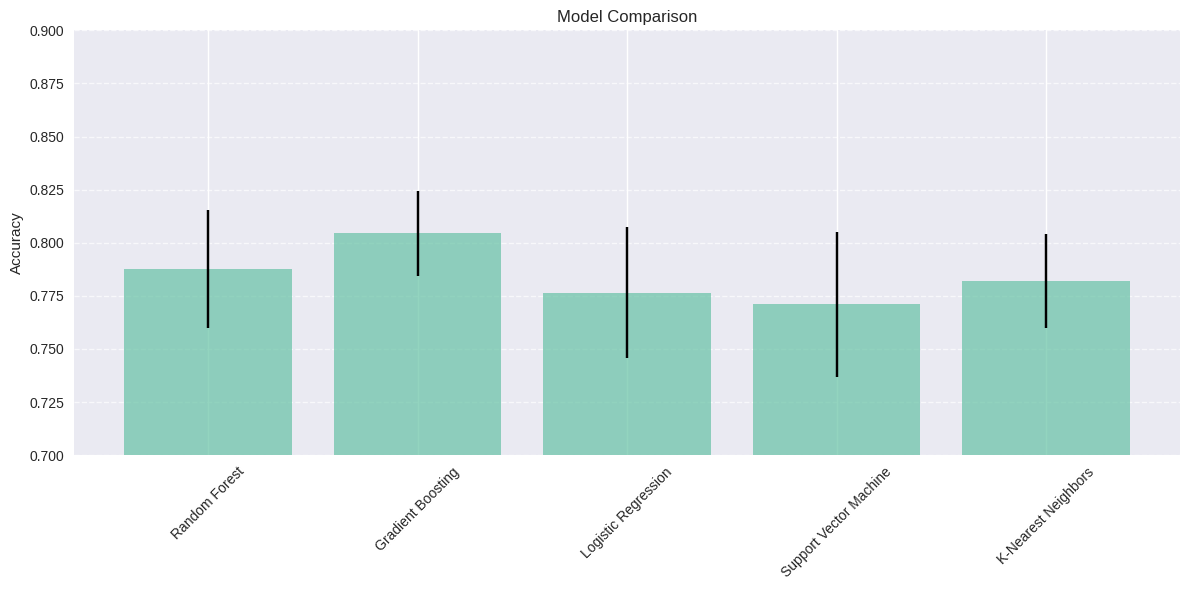

In [ ]:
# Compare model performance
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
cv_means = [results[name]['cv_mean'] for name in model_names]
cv_stds = [results[name]['cv_std'] for name in model_names]

x_pos = np.arange(len(model_names))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, accuracies, yerr=cv_stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(x_pos, model_names, rotation=45)
plt.ylim(0.7, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.77      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



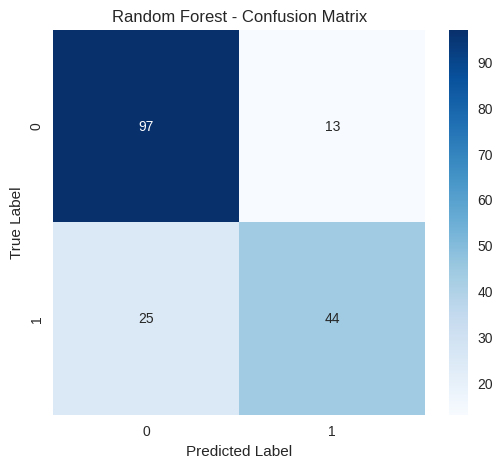


Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       110
           1       0.81      0.64      0.72        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



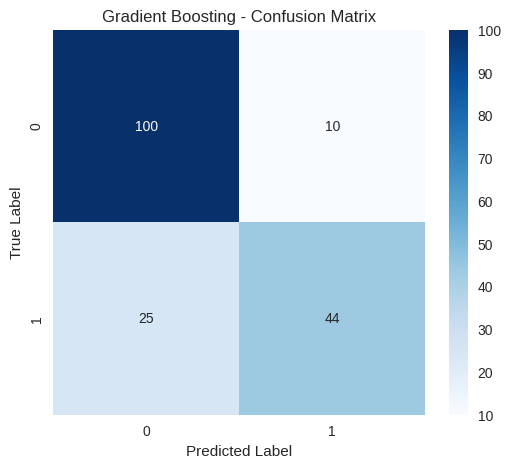


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



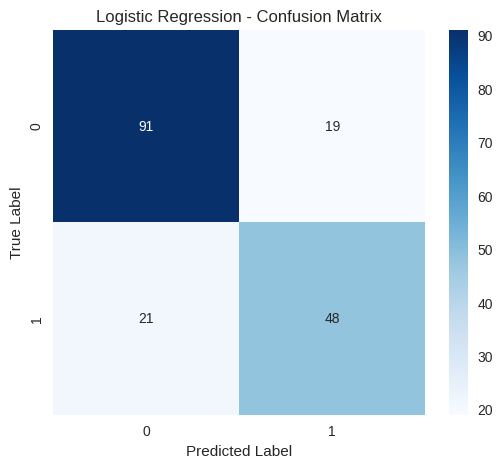


Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       110
           1       0.70      0.71      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



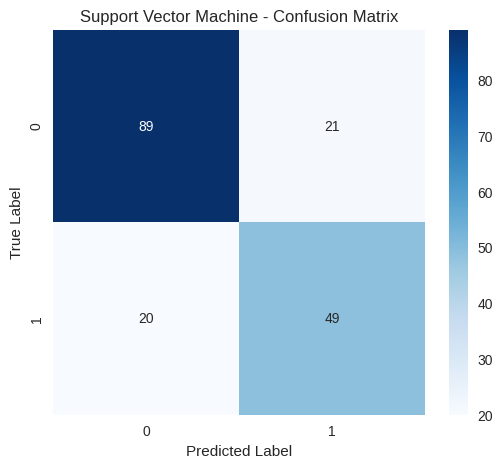


K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       110
           1       0.79      0.59      0.68        69

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



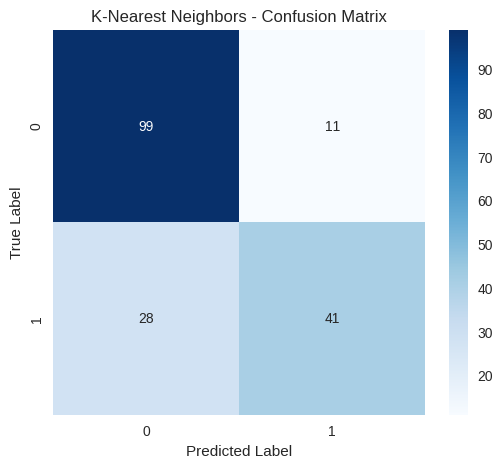

In [ ]:
# Detailed evaluation for each model
for name in results:
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, results[name]['y_pred']))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, results[name]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

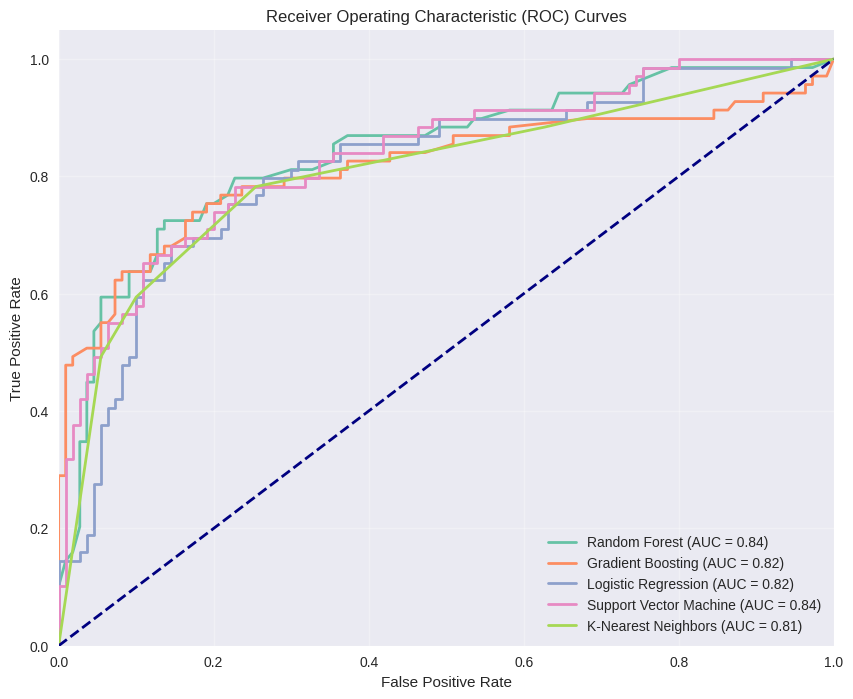

In [ ]:
# ROC Curves for models that support probability predictions
plt.figure(figsize=(10, 8))
for name in results:
    if results[name]['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

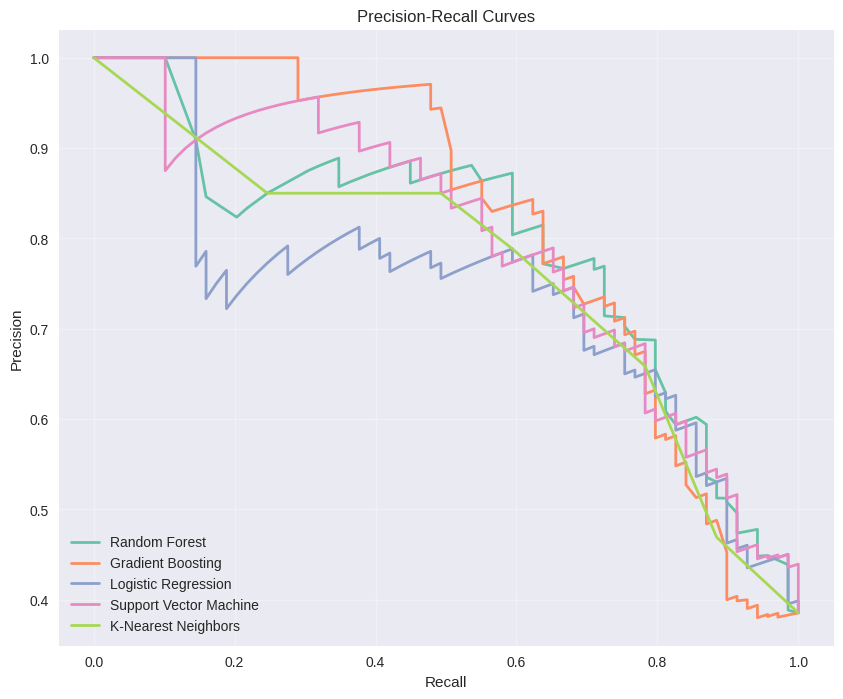

In [ ]:
# Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name in results:
    if results[name]['y_pred_proba'] is not None:
        precision, recall, _ = precision_recall_curve(y_test, results[name]['y_pred_proba'])
        plt.plot(recall, precision, lw=2, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


## Advanced Diagnostics
Learning curves to diagnose bias-variance tradeoff

Feature importance for tree-based models

Validation curves for hyperparameter analysis



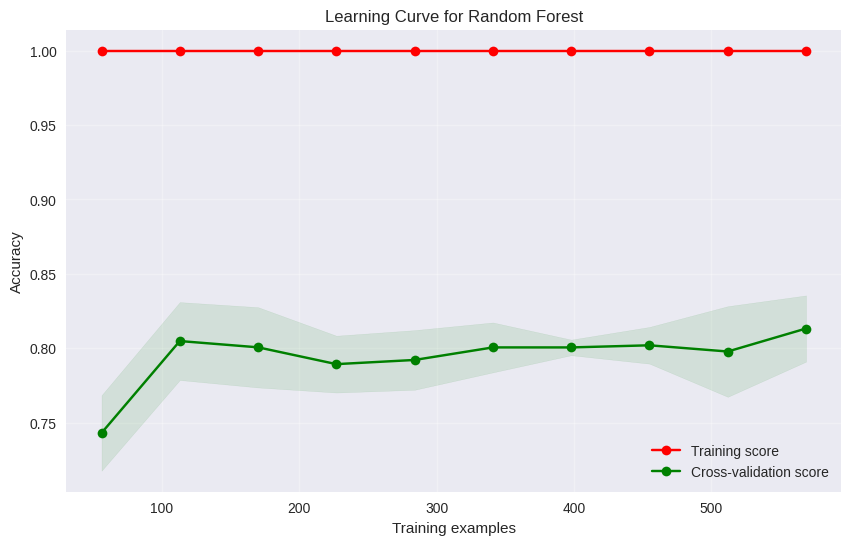

In [ ]:
# Learning curves for the best model
best_model_name = max(results, key=lambda x: results[x]['cv_mean'])
best_model = results[best_model_name]['model']

plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")


plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title(f'Learning Curve for {best_model_name}')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

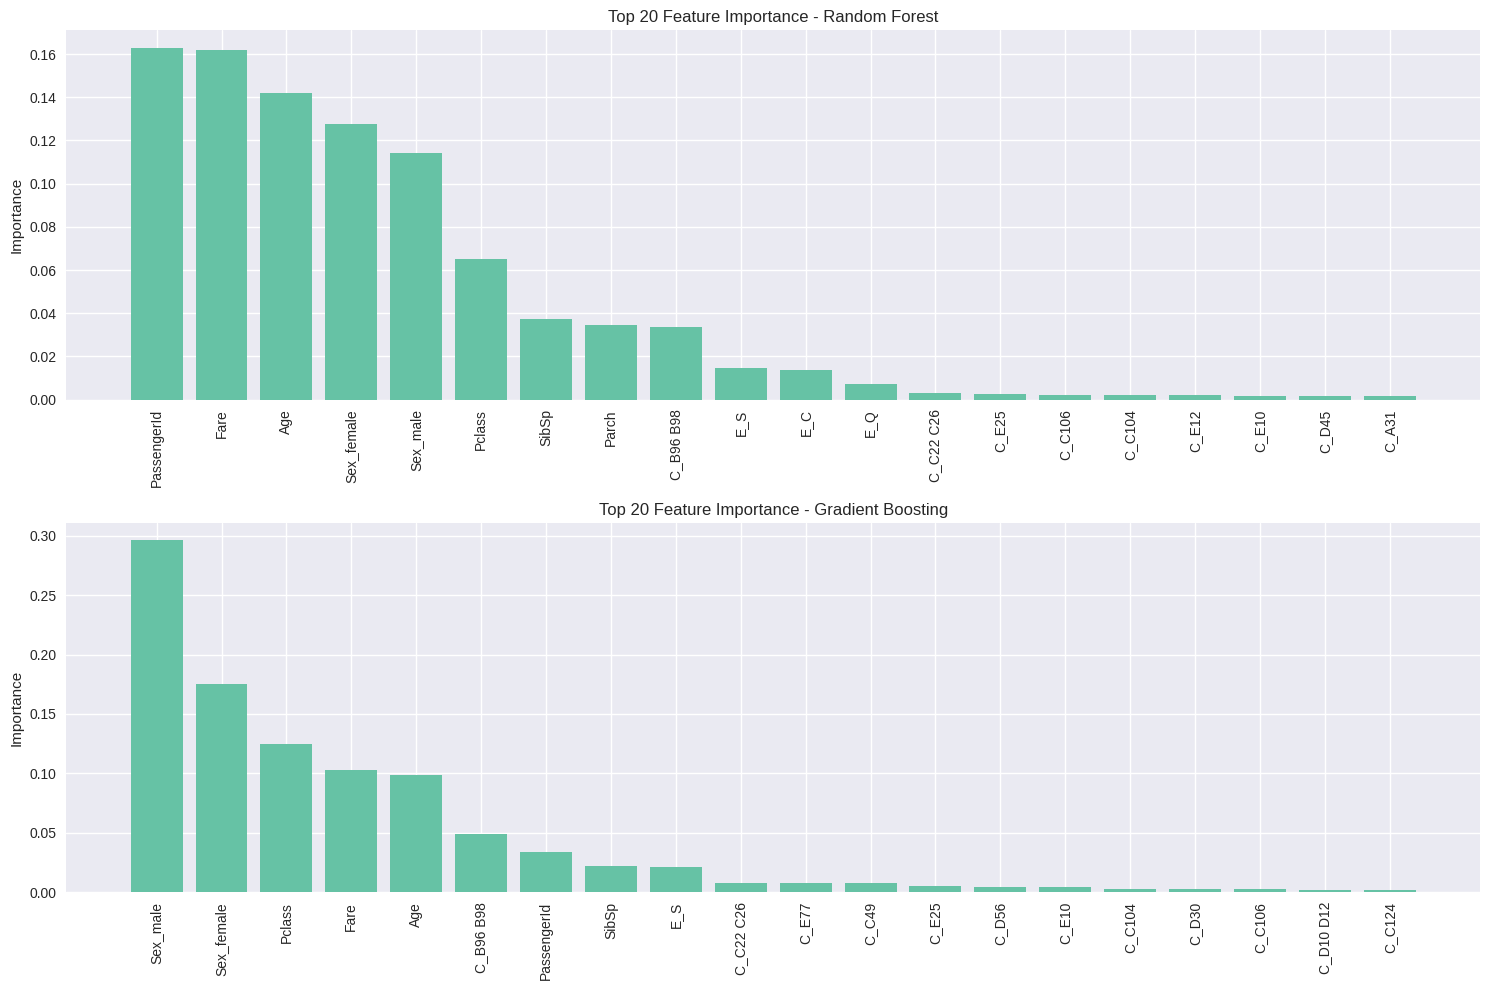

In [ ]:
# Feature importance for tree-based models
plt.figure(figsize=(15, 10))
for i, name in enumerate(['Random Forest', 'Gradient Boosting']):
    if name in results:
        model = results[name]['model']
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
            indices = np.argsort(importance)[::-1]

            # Select top 20 features
            top_n = 20
            top_indices = indices[:top_n]

            plt.subplot(2, 1, i+1) # Use 2 rows, 1 column for subplots
            plt.bar(range(top_n), importance[top_indices])
            plt.xticks(range(top_n), X.columns[top_indices], rotation=90)
            plt.title(f'Top {top_n} Feature Importance - {name}')
            plt.ylabel('Importance')
            plt.tight_layout()

plt.show()

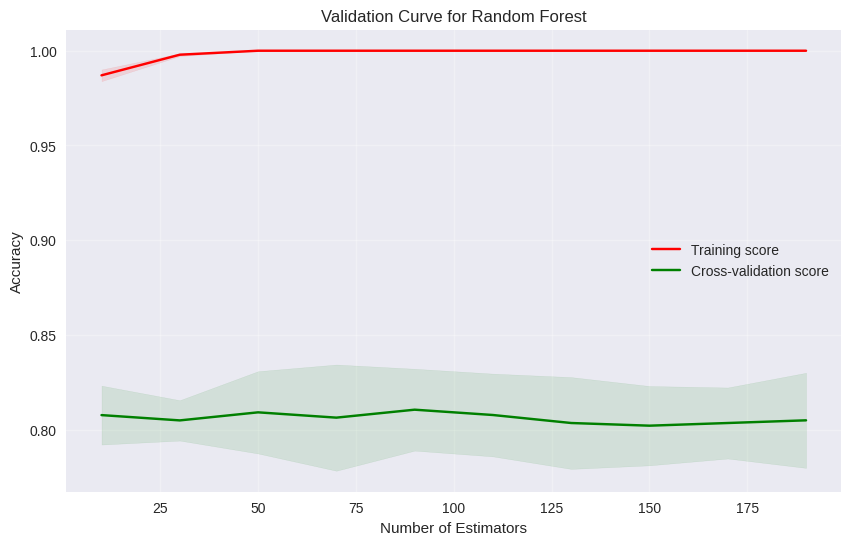

In [ ]:
# Validation curve for Random Forest (n_estimators parameter)
if 'Random Forest' in results:
    param_range = np.arange(10, 201, 20)
    train_scores, test_scores = validation_curve(
        RandomForestClassifier(random_state=42), X_train_scaled, y_train,
        param_name="n_estimators", param_range=param_range,
        cv=5, scoring="accuracy"
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, label="Training score", color="r")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="g")
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.legend(loc="best")
    plt.xlabel("Number of Estimators")
    plt.ylabel("Accuracy")
    plt.title("Validation Curve for Random Forest")
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:
# Print final comparison table
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'CV Mean Accuracy': cv_means,
    'CV Std': cv_stds
}).sort_values('CV Mean Accuracy', ascending=False)

print("\nFinal Model Comparison:")
print(comparison_df.to_string(index=False))


Final Model Comparison:
                 Model  Accuracy  CV Mean Accuracy   CV Std
         Random Forest  0.787709          0.810440 0.027712
     Gradient Boosting  0.804469          0.807604 0.019995
   K-Nearest Neighbors  0.782123          0.807574 0.022168
   Logistic Regression  0.776536          0.786575 0.030914
Support Vector Machine  0.770950          0.772550 0.034070
